## Feature Engineering: Feature Creation

### Read in text

In [2]:
import pandas as pd

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns=['Label', 'body_text']

### Create feature for text message length

In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))
data.head()

,Label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


### Create feature for % of text that is punctuation

In [6]:
import string

def count_puct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(' ')),3)*100

data['punct%']= data['body_text'].apply(lambda x: count_puct(x))
    

In [7]:
data.head()

,Label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Evaluate created features

In [8]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

AttributeError: 'Rectangle' object has no property 'normed'

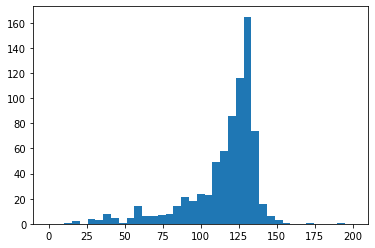

In [12]:
bins = np.linspace(0,200,40)
pyplot.hist(data[data['Label'] == 'spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['Label'] == 'ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()